In [22]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd

# 假设 rx 是一维复数接收信号数组
# 从CSV读取复数数据
data = pd.read_csv('../csv/demodulated_data.csv')  # 替换为实际的CSV文件路径
rx = data['RealPart'].values + 1j * data['ImagPart'].values

# 转为二维实数向量
X = np.column_stack((rx.real, rx.imag))

# k-means 聚类
kmeans = KMeans(n_clusters=8, random_state=0).fit(X)
centers = kmeans.cluster_centers_
# Convert centers to complex numbers
centers_complex = centers[:, 0] + 1j * centers[:, 1]

# Sort centers clockwise by angle
angles = np.angle(centers_complex)
# Convert angles to clockwise order (negate and sort)
clockwise_indices = np.argsort(angles)
centers_complex = centers_complex[clockwise_indices]
# Convert to Gray code order based on the table
# The sorted centers_complex are currently in clockwise order by angle
# We need to map them to Gray code positions: [0,1,3,2,6,7,5,4]
gray_order = [0, 1, 3, 2, 6, 7, 5, 4]
centers_gray = centers_complex[gray_order]
centers_complex = centers_gray

# 打印复制用
for c in centers_complex:
    print(f"{c.real:.6f} + {c.imag:.6f}i;")

-0.794546 + -0.298444i;
-0.425530 + -0.703649i;
0.731182 + -0.125290i;
0.232761 + -0.730665i;
-0.220880 + 0.731179i;
-0.772253 + 0.362395i;
0.270349 + 0.746917i;
0.682762 + 0.402678i;


np.float64(-3.1414926535901264)

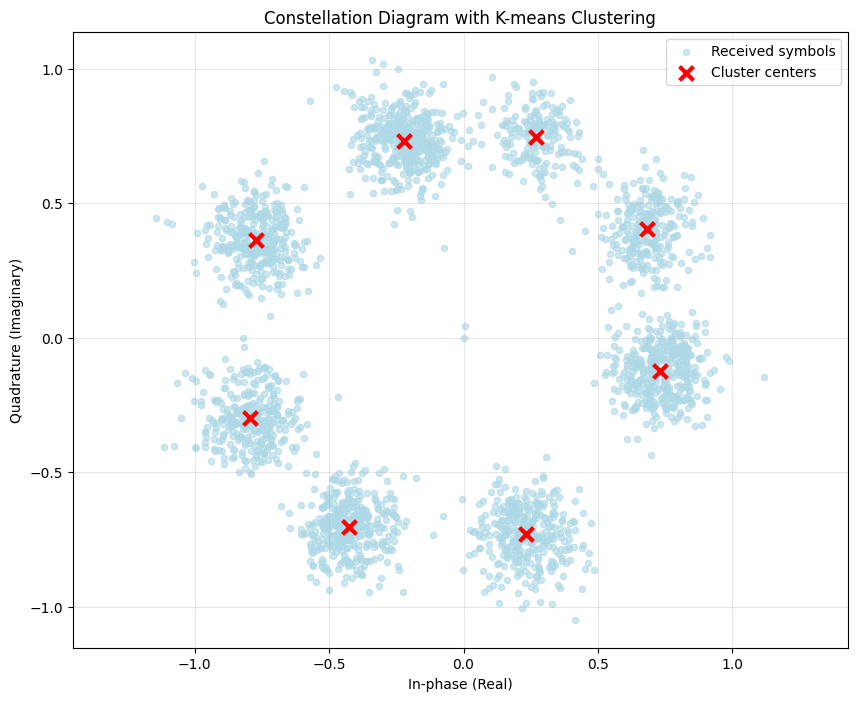

In [8]:
import matplotlib.pyplot as plt

# Create constellation plot
plt.figure(figsize=(10, 8))

# Plot original data points
plt.scatter(X[:, 0], X[:, 1], alpha=0.6, s=20, c='lightblue', label='Received symbols')

# Plot cluster centers
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, marker='x', linewidths=3, label='Cluster centers')

# Add labels and formatting
plt.xlabel('In-phase (Real)')
plt.ylabel('Quadrature (Imaginary)')
plt.title('Constellation Diagram with K-means Clustering')
plt.grid(True, alpha=0.3)
plt.legend()
plt.axis('equal')
plt.show()